# Table of contents

1. [Introduction](#introduction)  
2. [Processing](#processing)  
   2.1 [Loading data](#loading-data)  
   2.2 [Verifying loaded data](#verifying-loaded-data)  
   2.3 [Missing values](#missing-values)  
   2.4 [Data type conversion](#type-conversion)  
   2.5 [Duplicated values](#duplicated-values)
3. [Analysis](#analysis)  
   3.1 [Daily activity tracking](#daily-activity-tracking)  
   3.2 [Daily activity intensity](#daily-activity-intensity)  
   3.3 [Sleep activity tracking](#sleep-activity-tracking)  
   3.4 [Weight information tracking](#weight-information-tracking)  
   3.5 [Minutes of average total daily activity](#avg-minutes)  
   3.6 [Hourly steps distribution](#hourly-steps-distribution)  
   3.7 [Activity intensity distribution](#activity-intensity-distribution)  
4. [Conclusions](#conclusions)


# Introduction <a name="introduction"></a>

Bellabeat is a high-tech company that manufactures health-focused smart products and Urska Srsen, Bellabeat's cofounder, asked to analyze smart device usage data in order to gain insight on how people already use smart devices. By using this information the company is looking for recommendations that would help Bellabeat marketing strategy.

The data available for the analysis has been generated thanks to Amazon Mechanical Turk.

# Data preprocessing <a name="processing"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading data <a name="loading-data"></a>

In [32]:
# Datasets are being imported
# Notes: - "dailyActivity" has the same information as "dailySteps", "dailyIntensities" and "dailyCalories"
#          so it's not needed to import the other three datasets

dailyActivity = pd.read_csv("/content/drive/MyDrive/Data Analysis /Google Data Analytics certificate/Fitabase Data 4.12.16-5.12.16/dailyActivity.csv")
hourlyIntensities = pd.read_csv("/content/drive/MyDrive/Data Analysis /Google Data Analytics certificate/Fitabase Data 4.12.16-5.12.16/hourlyIntensities.csv")
hourlySteps = pd.read_csv("/content/drive/MyDrive/Data Analysis /Google Data Analytics certificate/Fitabase Data 4.12.16-5.12.16/hourlySteps.csv")
sleepDay = pd.read_csv("/content/drive/MyDrive/Data Analysis /Google Data Analytics certificate/Fitabase Data 4.12.16-5.12.16/sleepDay.csv")
weightLogInfo = pd.read_csv("/content/drive/MyDrive/Data Analysis /Google Data Analytics certificate/Fitabase Data 4.12.16-5.12.16/weightLogInfo.csv")

### Verifying loaded data <a name="verifying-loaded-data"></a>

In [43]:
# Checking if datasets have been imported correctly

dailyActivity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
hourlyIntensities.head(5)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [12]:
hourlySteps.head(5)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [13]:
sleepDay.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [14]:
weightLogInfo.head(5)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


### Missing values <a name="missing-values"></a>

In [23]:
# Checking for missing values and correct datatypes

dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [16]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [24]:
hourlySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [41]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [47]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 3.3+ KB


In [42]:
# Dropping 'Fat' column in weightLogInfo since it is missing most of its values

weightLogInfo.drop('Fat', axis=1, inplace=True)

### Data type conversion <a name="type-conversion"></a>

In [49]:
# Transforming the generic object columns containing dates into datetime64

dailyActivity['ActivityDate'] = dailyActivity['ActivityDate'].astype('datetime64[ns]')
hourlyIntensities['ActivityHour'] = hourlyIntensities['ActivityHour'].astype('datetime64[ns]')
hourlySteps['ActivityHour'] = hourlySteps['ActivityHour'].astype('datetime64[ns]')
sleepDay['SleepDay'] = sleepDay['SleepDay'].astype('datetime64[ns]')
weightLogInfo['Date'] = weightLogInfo['Date'].astype('datetime64[ns]')

### Duplicated values <a name="duplicated-values"></a>

In [ ]:
# Dropping duplicates

dailyActivity = dailyActivity.drop_duplicates()
hourlyIntensities = hourlyIntensities.drop_duplicates()
hourlySteps = hourlySteps.drop_duplicates()
sleepDay = sleepDay.drop_duplicates()
weightLogInfo = weightLogInfo.drop_duplicates()

# Analysis <a name="analysis"></a>

In [ ]:
# There are 33 unique IDs

len(dailyActivity['Id'].unique())

33

In [55]:
# The data has been taken in the time window between 4/12/2016 and 5/12/2016 (m/d/y)

min(dailyActivity['ActivityDate'])

Timestamp('2016-04-12 00:00:00')

In [56]:
max(dailyActivity['ActivityDate'])

Timestamp('2016-05-12 00:00:00')

### Daily activity tracking <a name="daily-activity-tracking"></a>

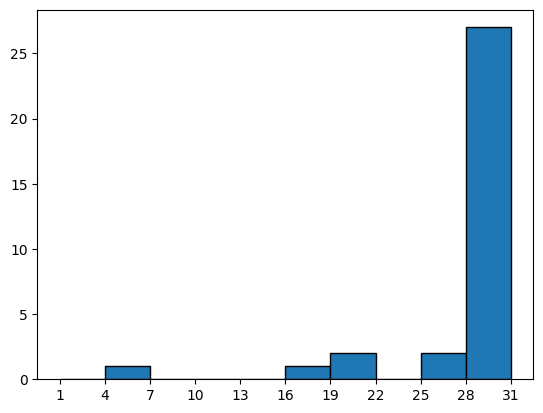

In [57]:
#  Out of the 33 users, 27 have kept the device on for at least
#  28 days out of 31 (more than 90% of the whole time window).

daily_tracking = {}
for user in dailyActivity['Id'].unique():
    daily_tracking[user] = len(dailyActivity.query('Id == @user')['Id'])

fig1, ax1 = plt.subplots()

ax1.hist(daily_tracking.values(),
         edgecolor = "black",
         bins = [1,4,7,10,13,16,19,22,25,28,31])
plt.xticks([1,4,7,10,13,16,19,22,25,28,31]);

### Daily activity intensity <a name="daily-activity-intensity"></a>

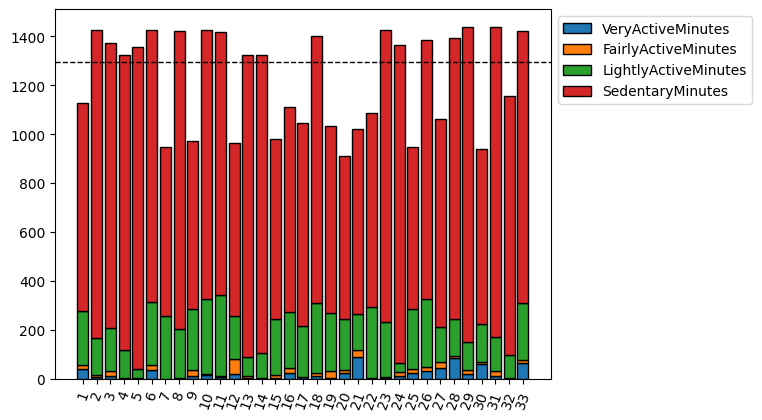

In [58]:
#  Out of the 33 users, 18 have kept on average their device on them
#  for more than 1296 minutes (more than 90% of the day duration)

daily_activity_intensity = {}
daily_activity_intensity_groupby = (pd.DataFrame(dailyActivity, columns=['Id', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'])
                                    .groupby(['Id'])
                                    .mean()
                                    .reset_index())

for intensity in ['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes']:
    daily_activity_intensity[intensity] = list(daily_activity_intensity_groupby[intensity])

fig2, ax2 = plt.subplots()

ax2.bar([x for x in range(1,34)],
        daily_activity_intensity['VeryActiveMinutes'],
        label='VeryActiveMinutes',
        edgecolor="black")

ax2.bar([x for x in range(1,34)],
        daily_activity_intensity['FairlyActiveMinutes'],
        bottom=daily_activity_intensity['VeryActiveMinutes'],
        label='FairlyActiveMinutes',
        edgecolor="black")

ax2.bar([x for x in range(1,34)],
        daily_activity_intensity['LightlyActiveMinutes'],
        bottom=[daily_activity_intensity['VeryActiveMinutes'][i] + daily_activity_intensity['FairlyActiveMinutes'][i] for i in range(len(daily_activity_intensity['VeryActiveMinutes']))],
        label='LightlyActiveMinutes',
        edgecolor="black")

ax2.bar([x for x in range(1,34)],
        daily_activity_intensity['SedentaryMinutes'],
        bottom=[daily_activity_intensity['VeryActiveMinutes'][i] + daily_activity_intensity['FairlyActiveMinutes'][i] + daily_activity_intensity['LightlyActiveMinutes'][i] for i in range(len(daily_activity_intensity['VeryActiveMinutes']))],
        label='SedentaryMinutes',
        edgecolor="black")

plt.axhline(1296,
            color="black",
            linestyle="dashed",
            linewidth=1)
plt.xticks([x for x in range(1,34)], rotation=70)

ax2.legend(bbox_to_anchor=(1,1));

### Sleep activity tracking <a name="sleep-activity-tracking"></a>

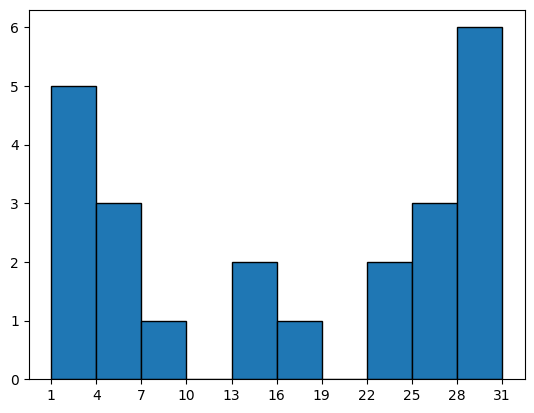

In [59]:
#  Out of 33 users, 24 have kept their device during sleep at least
#  once, only 7 have kept it for at least 28 days. This confirms the
#  prior hypotesis.

sleep_tracking = {}
for user in sleepDay['Id'].unique():
    sleep_tracking[user] = len(sleepDay.query('Id == @user')['Id'])

fig3, ax3 = plt.subplots()

ax3.hist(sleep_tracking.values(),
         edgecolor = "black",
         bins = [1,4,7,10,13,16,19,22,25,28,31])
plt.xticks([1,4,7,10,13,16,19,22,25,28,31]);

### Weight information tracking <a name="weight-information-tracking"></a>

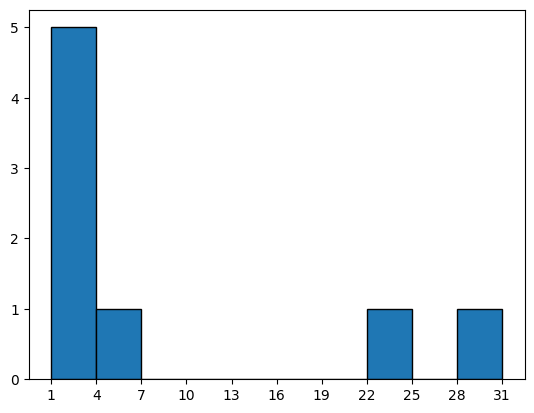

In [60]:
#  Out of the 33 users, 8 have tracked their weight at least once,
#  only 1 has kept track of their weight for at least 28 days.

weight_tracking = {}
for user in weightLogInfo['Id'].unique():
    weight_tracking[user] = len(weightLogInfo.query('Id == @user')['Id'])

fig4, ax4 = plt.subplots()

ax4.hist(weight_tracking.values(),
          edgecolor = "black",
          bins = [1,4,7,10,13,16,19,22,25,28,31])
plt.xticks([1,4,7,10,13,16,19,22,25,28,31]);

### Minutes of average total daily activity per user <a name="avg-minutes"></a>

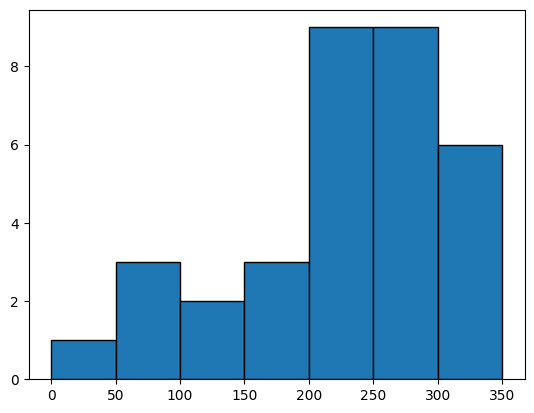

In [61]:
#  Out of 33 users, 24 (more than 72% of the whole group)
#  have more than 200 minutes of average total daily activity

total_activity = {}
for user in daily_activity_intensity_groupby['Id'].unique():
    total_activity[user] = sum([daily_activity_intensity_groupby.query('Id == @user')['VeryActiveMinutes'].values[0],
                                daily_activity_intensity_groupby.query('Id == @user')['FairlyActiveMinutes'].values[0],
                                daily_activity_intensity_groupby.query('Id == @user')['LightlyActiveMinutes'].values[0]]
                                )
fig5, ax5 = plt.subplots()

ax5.hist(total_activity.values(),
         edgecolor = "black",
         bins = [0, 50, 100, 150, 200, 250, 300, 350]);

### Hourly steps distribution <a name="hourly-steps-distribution"></a>

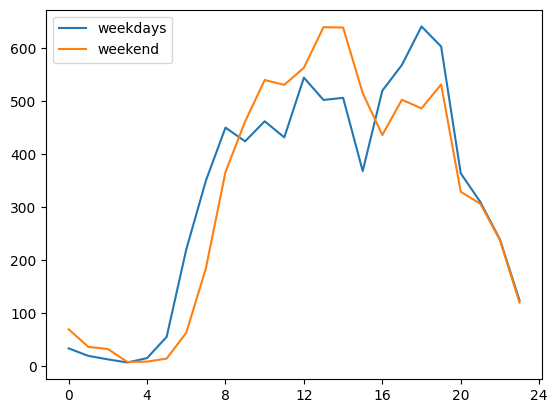

In [62]:
#  Users seem to be more incline to have more steps past
#  the usual working hours during weekdays and before the
#  usual working hours during weekends.

hourlySteps.insert(3, 'Hour', [pd.Timestamp(hourlySteps['ActivityHour'][i]).hour for i in hourlySteps.index])
hourlySteps.insert(4, 'Weekday', [pd.Timestamp(hourlySteps['ActivityHour'][i]).day_name() for i in hourlySteps.index])

hourly_weekdays = hourlySteps[(hourlySteps['Weekday'] == 'Monday') | (hourlySteps['Weekday'] == 'Tuesday') |
                              (hourlySteps['Weekday'] == 'Wednesday') | (hourlySteps['Weekday'] == 'Thursday') |
                              (hourlySteps['Weekday'] == 'Friday')]
hourly_weekend = hourlySteps[(hourlySteps['Weekday'] == 'Saturday') | (hourlySteps['Weekday'] == 'Sunday')]

hourly_weekdays_groupby = (pd.DataFrame(hourly_weekdays,
                                 columns=['StepTotal','Hour'])
                           .groupby(['Hour'])
                           .mean())

hourly_weekend_groupby = (pd.DataFrame(hourly_weekend,
                                columns=['StepTotal','Hour'])
                          .groupby(['Hour'])
                          .mean())

fig7, ax7 = plt.subplots()

ax7.plot([i for i in hourly_weekdays_groupby.index],
         list(hourly_weekdays_groupby['StepTotal']),
         label='weekdays')

ax7.plot([i for i in hourly_weekend_groupby.index],
         list(hourly_weekend_groupby['StepTotal']),
         label='weekend')
plt.xticks([0, 4, 8, 12, 16, 20, 24])
plt.legend();

### Activity intensity distribution <a name="activity-intensity-distribution"></a>

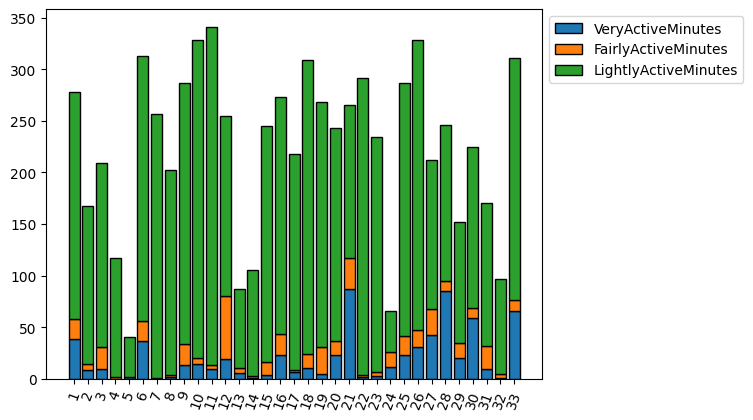

In [63]:
#  Users are mostly engaging light activities.

fig8, ax8 = plt.subplots()

ax8.bar([x for x in range(1,34)],
        daily_activity_intensity['VeryActiveMinutes'],
        label='VeryActiveMinutes',
        edgecolor="black")

ax8.bar([x for x in range(1,34)],
        daily_activity_intensity['FairlyActiveMinutes'],
        bottom=daily_activity_intensity['VeryActiveMinutes'],
        label='FairlyActiveMinutes',
        edgecolor="black")

ax8.bar([x for x in range(1,34)],
        daily_activity_intensity['LightlyActiveMinutes'],
        bottom=[daily_activity_intensity['VeryActiveMinutes'][i] + daily_activity_intensity['FairlyActiveMinutes'][i] for i in range(len(daily_activity_intensity['VeryActiveMinutes']))],
        label='LightlyActiveMinutes',
        edgecolor="black")
plt.legend(bbox_to_anchor=(1,1))
plt.xticks([x for x in range(1,34)], rotation=70);

### Conclusions <a name="conclusions"></a>

Most of the users have kept their device on during the 30 days. This could mean that users are actually interested in the device keeping track of their activities and calories or at least interested in parameters that could be tracked automatically.

The latter hypotesis is also supported by the information gained from the analysis of the sleepDay dataset, where it is clear that not everyone is interested or want their sleep activities being tracked, and the weightLogInfo dataset, where very few people tracked their weight at least once.

What Bellabeat could do is manufacture a device that tracks daily activity and calories while also elaborate further through the use of surveys the interest of people in tracking other parameters such as sleeping activity and tracking weight to understand the reasons behind people not using such features as much.

The information found through the analysis of the average minutes of activities during the week may point towards the users of the device being mainly working people since the activity minutes seem to increase after the usual working hours while during the weekend the trend seem to be the opposite: more minutes during working hours and less after. Together with the information of the amount of activity done on average varying a lot from person to person, this could lead to a scenario where users using this device fall under different profiles and therefore be interested in custom plans that would optimize the time they have at their disposal.